In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import coint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tickers = [
    # Sector ETFs
    'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY', 'XLU', 'XLRE', 'XLC',
    
    # Style/Factor ETFs
    'VTV', 'VUG', 'MTUM', 'QUAL', 'SPLV',
    
    # Major Index ETFs
    'SPY', 'VOO', 'DIA', 'IWM', 'QQQ',
    
    # Commodity ETFs
    'USO', 'GLD', 'DBC',
    
    # Thematic/Global ETFs
    'ARKK', 'EFA', 'EEM',
    
    'USMV', 'VLUE', 'SIZE', 'RPV', 'RPG',
    'VEU', 'EWJ', 'FXI', 'EWZ',
    'VNQ', 'SLV',
    'TLT', 'IEF', 'BOTZ', 'TAN', 'LIT', 'XRT', 'IYT'
]
prices = yf.download(tickers, start = '2010-01-01', end = '2020-12-31')['Close']

prices.dropna(inplace=True)
returns = prices.pct_change().dropna()

scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns.T)

returns_scaled



C:\Users\anair26\AppData\Local\Temp\ipykernel_22284\2099229847.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start = '2010-01-01', end = '2020-12-31')['Close']
[*********************100%***********************]  11 of 11 completed


array([[-1.3418116 , -0.74873021,  1.27380948, ..., -1.39263835,
         0.09673032,  1.51373354],
       [ 2.00936438, -0.0971687 , -0.16520853, ...,  1.87534143,
         0.53029044, -1.79184632],
       [ 0.29837605, -1.88841031,  2.0349099 , ..., -1.7488364 ,
        -1.12647912,  1.82099297],
       ...,
       [-0.47602534,  1.27854668,  0.19759434, ..., -0.14905664,
         0.7413299 ,  0.1021674 ],
       [-0.19259865, -0.04410997, -0.14857803, ..., -0.43280616,
         2.1646141 , -0.74153804],
       [ 0.36819795, -0.24094712, -1.02414407, ...,  0.89539018,
         0.87937576,  0.25849388]])

In [35]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(returns_scaled)

pca_components

array([[  6.43942313,   0.37702081],
       [ -1.72293072, -16.65869443],
       [ 30.77815704,  16.34115013],
       [ 10.12731514,   1.73386848],
       [  8.08426125,   1.28949201],
       [  0.494093  , -21.06244271],
       [-12.32954111,   5.7178282 ],
       [-16.32874972,  10.90736293],
       [-21.03143261,  14.71982772],
       [ -5.77102705,  -3.32360293],
       [  1.26043164, -10.0418102 ]])

In [ ]:
# Find K-means cluster with 50 ETFS
# 5-10

kmeans = KMeans(n_clusters=3, random_state=42)g
labels = kmeans.fit_predict(pca_components)

labels

array([0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2], dtype=int32)

In [37]:
cluster_df = pd.DataFrame({
    'ETF': returns.columns,
    'Cluster': labels,
    'PC1': pca_components[:, 0],
    'PC2': pca_components[:, 1]
})

cluster_df

,ETF,Cluster,PC1,PC2
0,XLB,0,6.439423,0.377021
1,XLC,2,-1.722931,-16.658694
2,XLE,0,30.778157,16.341150
3,XLF,0,10.127315,1.733868
4,XLI,0,8.084261,1.289492
5,XLK,2,0.494093,-21.062443
6,XLP,1,-12.329541,5.717828
7,XLRE,1,-16.328750,10.907363
8,XLU,1,-21.031433,14.719828
9,XLV,2,-5.771027,-3.323603


<Axes: xlabel='PC1', ylabel='PC2'>

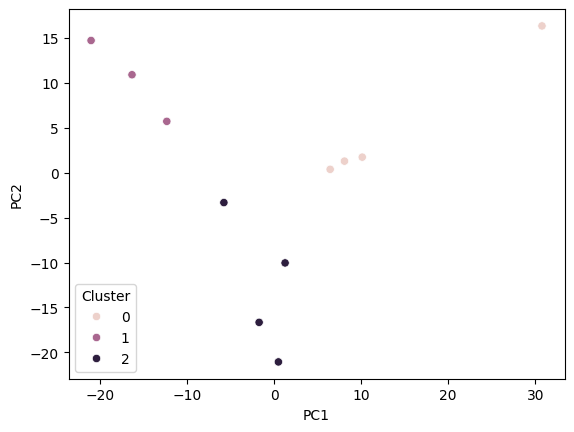

In [38]:
sns.scatterplot(data=cluster_df, x='PC1', y='PC2', hue='Cluster')


In [ ]:

'''
3 Cluster results:

0 - XLB, XLF, XLI, XLK,XLV,XLY
1 - XLU, XLP
2 - XLE

5 cluster results:

0 - XLB, XLF, XLI
1 - XLU
2 - XLE
3 - XLP
4 - XLV, XLK, XLY
    
XLE - outlier
'''
cluster_df = cluster_df.sort_values(by='Cluster')

cluster_df


,ETF,Cluster,PC1,PC2
0,XLB,0,6.439423,0.377021
2,XLE,0,30.778157,16.341150
3,XLF,0,10.127315,1.733868
4,XLI,0,8.084261,1.289492
7,XLRE,1,-16.328750,10.907363
6,XLP,1,-12.329541,5.717828
8,XLU,1,-21.031433,14.719828
1,XLC,2,-1.722931,-16.658694
5,XLK,2,0.494093,-21.062443
9,XLV,2,-5.771027,-3.323603


In [ ]:
# Step 1: Get the initial price for each column
start_price = prices.iloc[0]

# Step 2: Reconstruct the price series using cumulative product of (1 + returns)
reconstructed_prices = (1 + returns).cumprod()

# Step 3: Multiply by the starting price
prices = reconstructed_prices * start_price

In [ ]:
#DISTANCE FILTERING



normalized_prices = prices / prices.iloc[0] 

pair_list = []
for i in range(len(tickers)):
    for j in range(i + 1, len(tickers)):  # avoid duplicates and self-pairs
        pair_list.append((tickers[i], tickers[j]))

pair_distances = []
for etf1, etf2 in pair_list:
    distance = np.sqrt(np.sum((normalized_prices[etf1] - normalized_prices[etf2]) ** 2))
    pair_distances.append({'Pair': f'{etf1}-{etf2}', 'Distance': distance})

distance_df = pd.DataFrame(pair_distances).sort_values(by='Distance')

distance_df = distance_df[:13]

distance_df


In [ ]:
returns = prices.pct_change().dropna()


In [ ]:
# REGULAR cointegration

tickers = prices.columns
cointegrated_pairs = []
prices = prices.dropna()
candidate_pairs = []

for i in range(len(tickers)):
    for j in range(i + 1, len(tickers)):
        candidate_pairs.append([tickers[i], tickers[j]])

for i, j in candidate_pairs:
        etf1 = i
        etf2 = j

        score, pvalue, _ = coint(prices[etf1], prices[etf2])

        if pvalue < 0.1:
                cointegrated_pairs.append((etf1, etf2, pvalue))
                
cointegrated_pairs_df = pd.DataFrame(cointegrated_pairs, columns = ['ETF', 'Pair', 'P-Value'])
cointegrated_pairs_df = cointegrated_pairs_df.sort_values('P-Value').reset_index(drop=True)

print("Cointegration Test Results:")
cointegrated_pairs_df

In [ ]:
# rolling coint

rolling_cointegrated_pairs = []
prices = prices.dropna()

window_size = 504
min_passes = 0.6
step = 30

for etf1, etf2 in candidate_pairs:
        series1 = prices[etf1]
        series2 = prices[etf2]

        df = pd.concat([series1, series2], axis = 1)

        if df[etf1].empty:
            print(f"{etf1} does not have sufficient data")
            continue
        elif df[etf2].empty:
            print(f"{etf2} does not have sufficient data")  

        series1 = df.iloc[:, 0]
        series2 = df.iloc[:, 1]

        cointegrated_windows = 0
        total_windows = 0

        for start in range(0, len(df) - window_size + 1, step):
              end = start + window_size

              window_s1 = series1.iloc[start:end]
              window_s2 = series2.iloc[start:end]
              
              score, pvalue, _ = coint(window_s1, window_s2)
              total_windows += 1
              
              if pvalue < 0.05:
                   cointegrated_windows += 1

        if cointegrated_windows / total_windows >= min_passes:
             rolling_cointegrated_pairs.append({'ETF1': etf1,
                                        'ETF2': etf2,
                                        'Pass %': cointegrated_windows / total_windows})
                
rolling_cointegrated_pairs_df = pd.DataFrame(rolling_cointegrated_pairs)
rolling_cointegrated_pairs_df = rolling_cointegrated_pairs_df.sort_values('Pass %', ascending = False).reset_index(drop=True)

print("Rolling Cointegration Test Results:")
rolling_cointegrated_pairs_df